[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Age')]

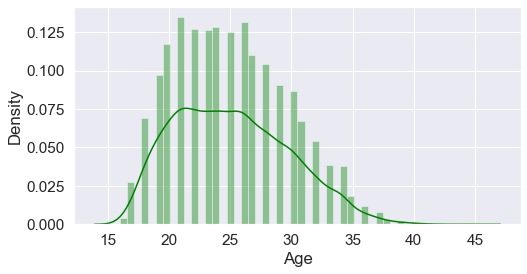

In [250]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree,preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,train_test_split
import seaborn as sns
import sklearn.metrics as metrics
import csv

#Reading in the data
data=pd.read_csv('data.csv')

#Shape of Dataset (rows,columns)
data.shape

#Name of Columns
data.columns

plt.figure(figsize=[8,4])
ageGraph=sns.distplot(futbol['Age'],color="Green",label="Age Distribution")
ageGraph.set(xlabel="Age",ylabel="Density")

In [251]:
data["Age"].mean()

25.122205745043114

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Overall Rating')]

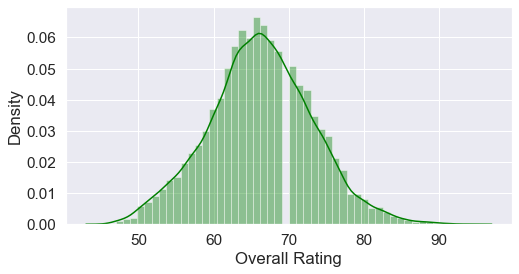

In [252]:
#View Distribution of Overall Rating
plt.figure(figsize=[8,4])
ageGraph=sns.distplot(futbol['Overall'],color="Green",label="Overall Rating Distribution")
ageGraph.set(xlabel="Overall Rating",ylabel="Density")


In [253]:
#Average rating of player in Fifa
data['Overall'].mean()

66.23869940132916

Text(0, 0.5, 'Number of Players')

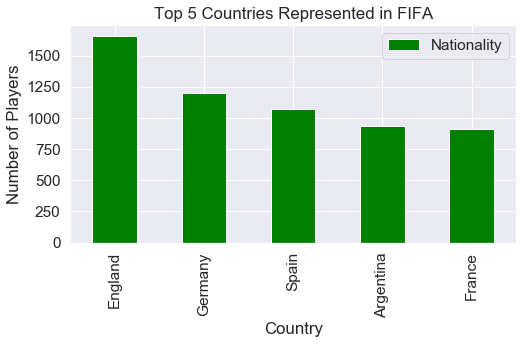

In [254]:
#Top 10 Countries with highest number of players
topCountry=data["Nationality"].value_counts().head(5)
tcDF=topCountry.to_frame()
axtcDF=tcDF.plot(kind="bar",figsize=[8,4],color="Green",title="Top 5 Countries Represented in FIFA")
axtcDF.set_xlabel("Country")
axtcDF.set_ylabel("Number of Players")

In [255]:
# Cleaning the Data
futbol=data.copy()

#Convert string values of value and wage to float value
#For example €405K will convert to 405000
def str2float(euros):
    #Convert K in wage to thousands
    if euros[-1]=="K":
        return float(euros[1:-1])*1000
    #Convert M to millions
    elif euros[-1]=="M":
        return float(euros[1:-1])*1000000
    else:
        return float(euros[1:])

#Using lambda function to apply strtofloat
futbol['Value']=futbol['Value'].apply(lambda x: str2float(x))
futbol['Wage']=futbol['Wage'].apply(lambda x: str2float(x))

In [256]:
futbol[['Name','Value','Wage']].head(5)

,Name,Value,Wage
0,L. Messi,110500000.0,565000.0
1,Cristiano Ronaldo,77000000.0,405000.0
2,Neymar Jr,118500000.0,290000.0
3,De Gea,72000000.0,260000.0
4,K. De Bruyne,102000000.0,355000.0


In [257]:
#Now we can sort the value because it is now a float value
#This is the top 5 players base on their Value
futbol.sort_values(by='Value',ascending=False)[['Name','Overall','Value','Wage']][:5]

,Name,Overall,Value,Wage
2,Neymar Jr,92,118500000.0,290000.0
0,L. Messi,94,110500000.0,565000.0
4,K. De Bruyne,91,102000000.0,355000.0
5,E. Hazard,91,93000000.0,340000.0
15,P. Dybala,89,89000000.0,205000.0


In [258]:
#Top 10 Countries with Oldest Players
futbol.groupby(['Nationality'])['Age'].mean().sort_values(ascending=False).head(10)

Nationality
Oman                   36.00
Puerto Rico            34.00
Ethiopia               32.00
Trinidad & Tobago      31.75
Palestine              31.00
Kuwait                 31.00
São Tomé & Príncipe    31.00
Fiji                   30.00
Guam                   30.00
New Caledonia          30.00
Name: Age, dtype: float64

In [259]:
#Top 10 Countries with Youngest Players
futbol.groupby(['Nationality'])['Age'].mean().sort_values(ascending=True).head(10)

Nationality
Indonesia             17.000000
Botswana              20.000000
Rwanda                21.000000
Tanzania              22.000000
Zambia                22.222222
Chad                  22.500000
Afghanistan           22.500000
Antigua & Barbuda     22.750000
Dominican Republic    23.000000
Mauritania            23.000000
Name: Age, dtype: float64

In [260]:
#Top 10 Most Overall Rated Countries
futbol.groupby(['Nationality'])['Overall'].mean().sort_values(ascending=False).head(10)

Nationality
United Arab Emirates    77.000000
Central African Rep.    73.333333
Israel                  72.142857
Dominican Republic      72.000000
Oman                    72.000000
São Tomé & Príncipe     72.000000
Cape Verde              71.631579
Portugal                71.344720
Togo                    71.333333
Brazil                  71.251511
Name: Overall, dtype: float64

In [261]:
#Top 10 Worst Overall Rated Countries
futbol.groupby(['Nationality'])['Overall'].mean().sort_values(ascending=True).head(10)

Nationality
Botswana               56.000000
Indonesia              56.000000
India                  58.666667
China PR               59.910714
South Sudan            60.000000
Belize                 60.000000
Hong Kong              60.500000
Saudi Arabia           60.767647
Republic of Ireland    60.885870
Afghanistan            61.000000
Name: Overall, dtype: float64

In [262]:
#Top 10 Clubs based on Overall Rating of Players
futbol.groupby(['Club'])['Overall'].mean().sort_values(ascending=False).head(10)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
SL Benfica             77.000000
Name: Overall, dtype: float64

In [263]:
#Worst 10 Clubs based on Overall Rating of Players
futbol.groupby(['Club'])['Overall'].mean().sort_values(ascending=True).head(10)

Club
Bray Wanderers            53.652174
Limerick FC               54.526316
Bohemian FC               55.000000
Derry City                55.777778
Sligo Rovers              56.631579
Crewe Alexandra           56.785714
Cambridge United          56.928571
Morecambe                 57.000000
Waterford FC              57.200000
St. Patrick's Athletic    57.782609
Name: Overall, dtype: float64

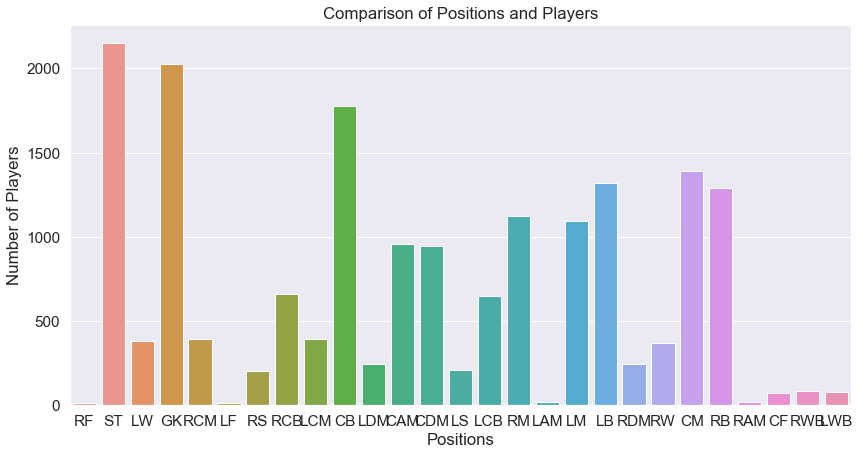

In [264]:
plt.figure(figsize = (14, 7))
ax = sns.countplot('Position', data = data)
ax.set_xlabel(xlabel = 'Positions')
ax.set_ylabel(ylabel = 'Number of Players')
ax.set_title(label = 'Comparison of Positions and Players')
plt.show()

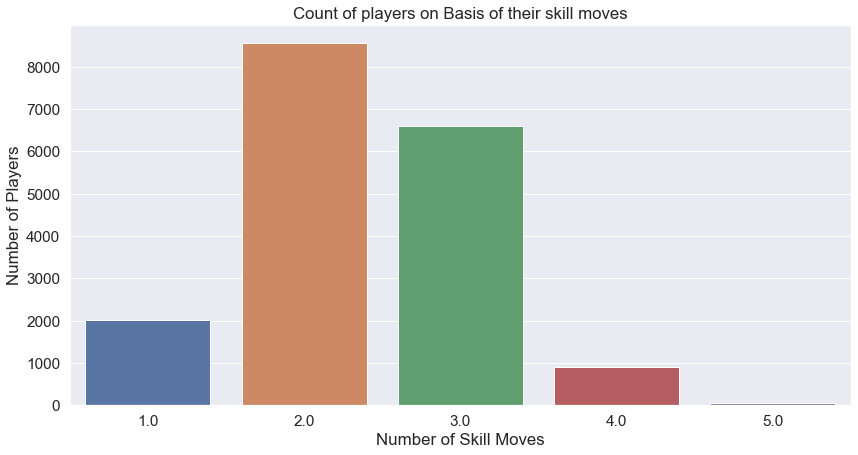

In [265]:
plt.figure(figsize = (14, 7))
ax = sns.countplot(x = 'Skill Moves', data = data)
ax.set_title(label = 'Count of players on Basis of their skill moves')
ax.set_xlabel(xlabel = 'Number of Skill Moves')
ax.set_ylabel(ylabel = 'Number of Players')
plt.show()

In [266]:
#Preprocesing the data
def load_dataset(dataSet_path):
    newFData = pd.read_csv(dataSet_path)
    return newFData
def remove_Nulls(df):
    df.dropna(inplace=True)
# Coversion weight to int
# Taking off the lbs at the end of the string and parsing it as an int
def weight_to_int(df):
    df['Weight'] = df['Weight'].str[:-3]
    df['Weight'] = df['Weight'].apply(lambda x: int(x))
    return df
# Coversion height to int(centimeters)
def height_convert(df_height):
        try:
            feet = int(df_height[0])
            dlm = df_height[-2]
            if dlm == "'":
                height = round((feet * 12 + int(df_height[-1])) * 2.54, 0)
            elif dlm != "'":
                height = round((feet * 12 + int(df_height[-2:])) * 2.54, 0)
        except ValueError:
            height = 0
        return height
def height_to_int(df):
    df['Height'] = df['Height'].apply(height_convert)
def binary_Coding(df,column):
    encoder = preprocessing.LabelEncoder()
    df[column] = encoder.fit_transform(df[column].values)
def drop_columns(df):
    df.drop(df.loc[:, 'Rank':'Name' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Photo':'Special'],axis=1, inplace = True)
    df.drop(df.loc[:, 'International Reputation':'Real Face' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Jersey Number':'Contract Valid Until' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'LS':'RB'],axis=1, inplace = True)
    df.drop(df.loc[:, 'GKDiving':'Release Clause'],axis=1, inplace = True)
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      df.loc[df.Position == i , 'Position'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      df.loc[df.Position == i , 'Position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']:
      df.loc[df.Position == i , 'Position'] = 'Defender' 


Text(0, 0.5, 'Number of Players')

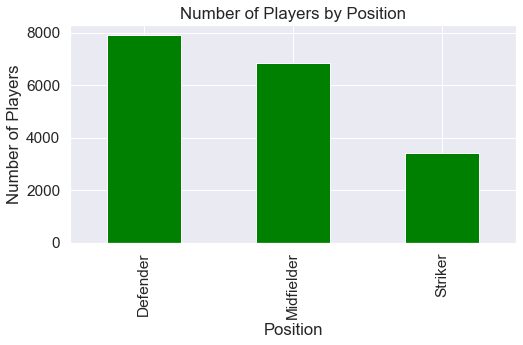

In [267]:
#Model Creation and Implementation
#This is my training dataset 
dfnew=load_dataset("data.csv")
#Dropping unnecessary columns that we dont need
drop_columns(dfnew)
#Taking out nulls from dataset
remove_Nulls(dfnew)

#Changing the string values to integer values for further processing
weight_to_int(dfnew)
height_to_int(dfnew)

#Easier classficiation technique 
binary_Coding(dfnew,'Preferred Foot')
transform_positions(dfnew)

#Seeing a sample of the data
countPosition=dfnew['Position'].value_counts()
axescP=countPosition.plot(kind="bar",figsize=[8,4],color="Green",title="Number of Players by Position")
axescP.set_xlabel("Position")
axescP.set_ylabel("Number of Players")

In [268]:
def rate_skill(df,coltoCat):
    bins=(20,40,60,80,100)
    actualRating=['Poor','Moderate','Average','Great']
    categories=pd.cut(df[coltoCat],bins,labels=actualRating)
    newCol=coltoCat+"_Cat"
    df[newCol]=categories
rate_skill(dfnew,"Volleys")

Text(0.5, 1, 'Comparing Volley Ability and Vision based on Position')

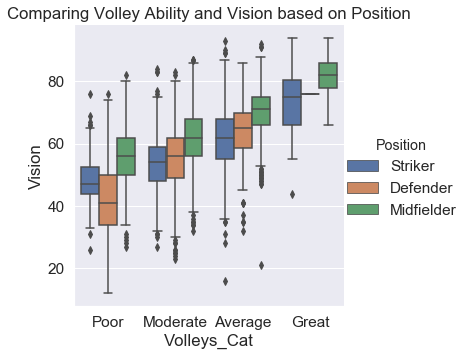

In [269]:
# Category plot Volleys &  By position
catGraph=sns.catplot(x="Volleys_Cat", y="Vision", hue="Position",
            kind="box", data=dfnew)
axesCat=catGraph.axes.flatten()
axesCat[0].set_title("Comparing Volley Ability and Vision based on Position")

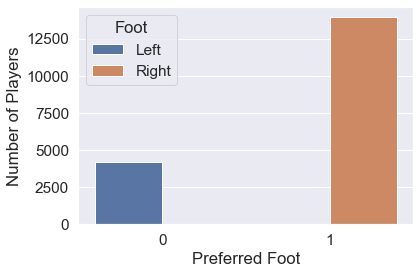

In [270]:
#Preprocessing Data
drop_cols=['Volleys_Cat']
modelDF=dfnew.drop(drop_cols,1)


ax = sns.countplot('Preferred Foot', data =modelDF , hue='Preferred Foot')
ax.legend(title='Foot',labels=['Left','Right'])
ax.set_ylabel("Number of Players")
plt.show()


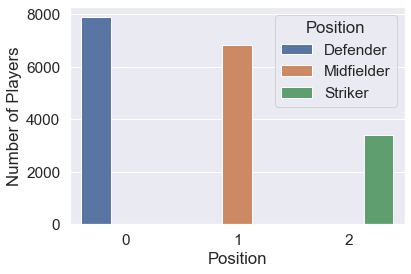

In [271]:
#Coding the positions Defender=0 Midfielder=1 Striker=2
positions=modelDF['Position'].unique()
encoder=preprocessing.LabelEncoder()
modelDF['Position']=encoder.fit_transform(modelDF['Position'])
ax1=sns.countplot(x="Position",data=modelDF,hue='Position')
ax1.legend(title='Position',labels=['Defender','Midfielder','Striker'])
ax1.set_ylabel("Number of Players")
plt.show()


In [272]:
modelDF.head()

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,0,2,170.0,159,84.0,95.0,70.0,90.0,86.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,1,2,188.0,183,84.0,94.0,89.0,81.0,87.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,1,2,175.0,150,79.0,87.0,62.0,84.0,84.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,27,1,0,193.0,168,17.0,13.0,21.0,50.0,13.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,27,1,1,180.0,154,93.0,82.0,55.0,92.0,82.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [273]:
#Creating the model
y=modelDF['Position']

modelDF.drop(columns=['Position'],inplace=True)

X_train_dev, X_test, y_train_dev, y_test = train_test_split(modelDF, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [274]:
#Plotting confusion matrix
#Inspired by https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt=".2%",cmap='Blues') #annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig
    

In [275]:
def train_and_score(clf,X_train,y_train,X_test,y_test):
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    cf = confusion_matrix(y_test,preds)

    print(plot_confusion_matrix(cf, class_names=positions))

    print(" Accuracy: ",accuracy_score(y_test, preds))
    print(" F1 score: ",metrics.f1_score(y_test, preds,average='weighted'))
    


Figure(720x504)
 Accuracy:  0.8829201101928374
 F1 score:  0.8826041487909726


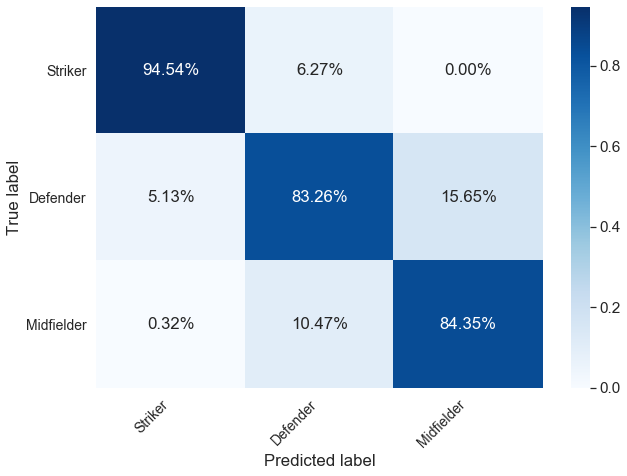

In [276]:
knn_model = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
KNN = GridSearchCV(knn_model, param_grid, cv=5)

train_and_score(KNN,X_train_dev,y_train_dev,X_test,y_test)
